# Genetic Algorithms
### A problem-solving approach inspired by nature

In [1]:
import random as rnd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
def mutate(sol, rate=0.50, alpha=1.0):
    """ Mutate a solution: Introduce some changes to the solution
        (Maybe good or maybe bad!) """
    return tuple((x + rnd.uniform(-alpha, alpha) if rnd.random() < rate else x for x in sol))

In [70]:
def GA(seed, maxpop, f, epochs, mutation_rate=0.50, alpha=1.0):
    """
    maxpop - the maximum population size with each generation
    f - solution fitness function f(sol) ==> a number (smaller is better)
    epochs - the number of generations
    """
    
    # seed the population
    # pop =[(score1, sol1), (score2, sol2), ...]
    pop = [(f(seed), seed)]
    
    for _ in range(epochs):
        
        # Mutate every solution in the current population
        mutants = [mutate(sol, mutation_rate, alpha) for _, sol in pop]
        scored = [(f(m), m) for m in mutants]
        pop += scored
        
        # find the best solutions - kill the rest
        pop = sorted(pop)[:maxpop]
    
    return pop[0]

In [98]:
# use evocomp to find a particular point
seed = (1, 2, 3, 4, 5)
goal = (3.14, 3.14, 3.14, 3.14)

def myfitness(sol):
    return sum([(x - 3.14) ** 2 for x in sol]) ** 0.5

pop = GA(seed, 5, myfitness, 1000, mutation_rate=0.50, alpha=1.0)
print(pop)

(0.009480887680410086, (3.1382085961805517, 3.142739215530529, 3.148266894216979, 3.1376458630343476, 3.137699717192658))


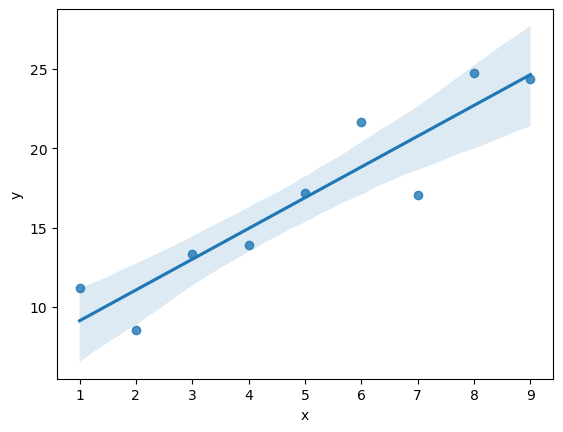

In [101]:
# use evocomp to do linear regression
xs = np.arange(1,10)
ys = [7 + 2 * x +  rnd.gauss(0, 2) for x in xs]
df = pd.DataFrame({'x':xs, 'y':ys})

sns.regplot(df, x='x', y='y')
plt.show()

In [102]:
def MSE(y, ypred):
    diff = y - ypred
    return np.dot(diff, diff) / len(y)

In [103]:
def linear_model_error(sol):
    B0, B1 = sol
    y = df.y
    ypred = B0 + B1 * df.x
    return MSE(y, ypred)

(7.24809088923452, 1.9295557523639404)


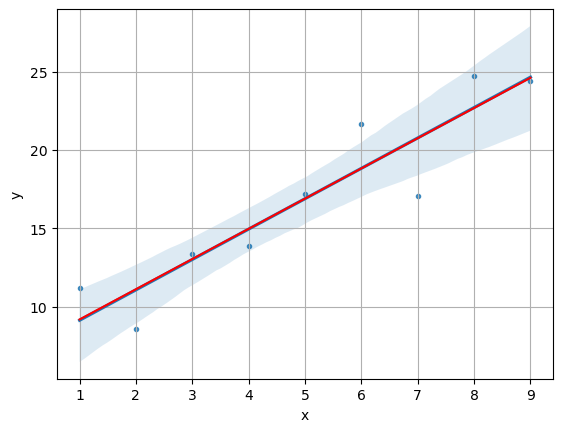

In [114]:
score, sol = GA((0, 0), 5, linear_model_error, 500, 1.0)
print(sol)
sns.regplot(df, x='x', y='y', marker='.')
plt.plot(df.x, sol[0] + sol[1] * df.x, c='r')
plt.grid()
plt.show()